# Boston Housing Price Prediction

In this project, I will predict housing prices in Boston using various machine learning models. The goal is to compare the performance of different models and evaluate which one provides the most accurate predictions.

## Models Used:
1. **Linear Regression**
2. **Decision Tree**
3. **Random Forest**
4. **Gradient Boosting**
5. **XGBoost**

For each model, I will evaluate its performance using metrics like Mean Squared Error (MSE) and R-squared (R²). The results will be summarized in a comparison table.

## Dataset:
The dataset used in this project is the [Boston Housing Dataset](https://github.com/selva86/datasets/blob/master/BostonHousing.csv). It contains information about housing prices in Boston and includes various features like crime rate, average number of rooms, and more.

## Objective:
The primary objective of this project is to compare the performance of different machine learning models in predicting housing prices. This project will also help improve my skills in data preprocessing, feature engineering, and model evaluation.


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import xgboost as xgb


In [3]:
data = pd.read_csv('BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# Check for missing values
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
# Check basic information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
# Calculate descriptive statistics
desc = data.describe()

# Convert the entire describe DataFrame to object type to allow mixed types
desc = desc.astype(object)

# Convert the 'count' row to integer so that it doesn't show decimals
desc.loc['count'] = desc.loc['count'].apply(lambda x: int(x))

desc

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506,506,506,506,506,506,506,506,506,506,506,506,506,506
mean,3.613524,11.363636,11.136779,0.06917,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.10571,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.00632,0.0,0.46,0.0,0.385,3.561,2.9,1.1296,1.0,187.0,12.6,0.32,1.73,5.0
25%,0.082045,0.0,5.19,0.0,0.449,5.8855,45.025,2.100175,4.0,279.0,17.4,375.3775,6.95,17.025
50%,0.25651,0.0,9.69,0.0,0.538,6.2085,77.5,3.20745,5.0,330.0,19.05,391.44,11.36,21.2
75%,3.677083,12.5,18.1,0.0,0.624,6.6235,94.075,5.188425,24.0,666.0,20.2,396.225,16.955,25.0
max,88.9762,100.0,27.74,1.0,0.871,8.78,100.0,12.1265,24.0,711.0,22.0,396.9,37.97,50.0


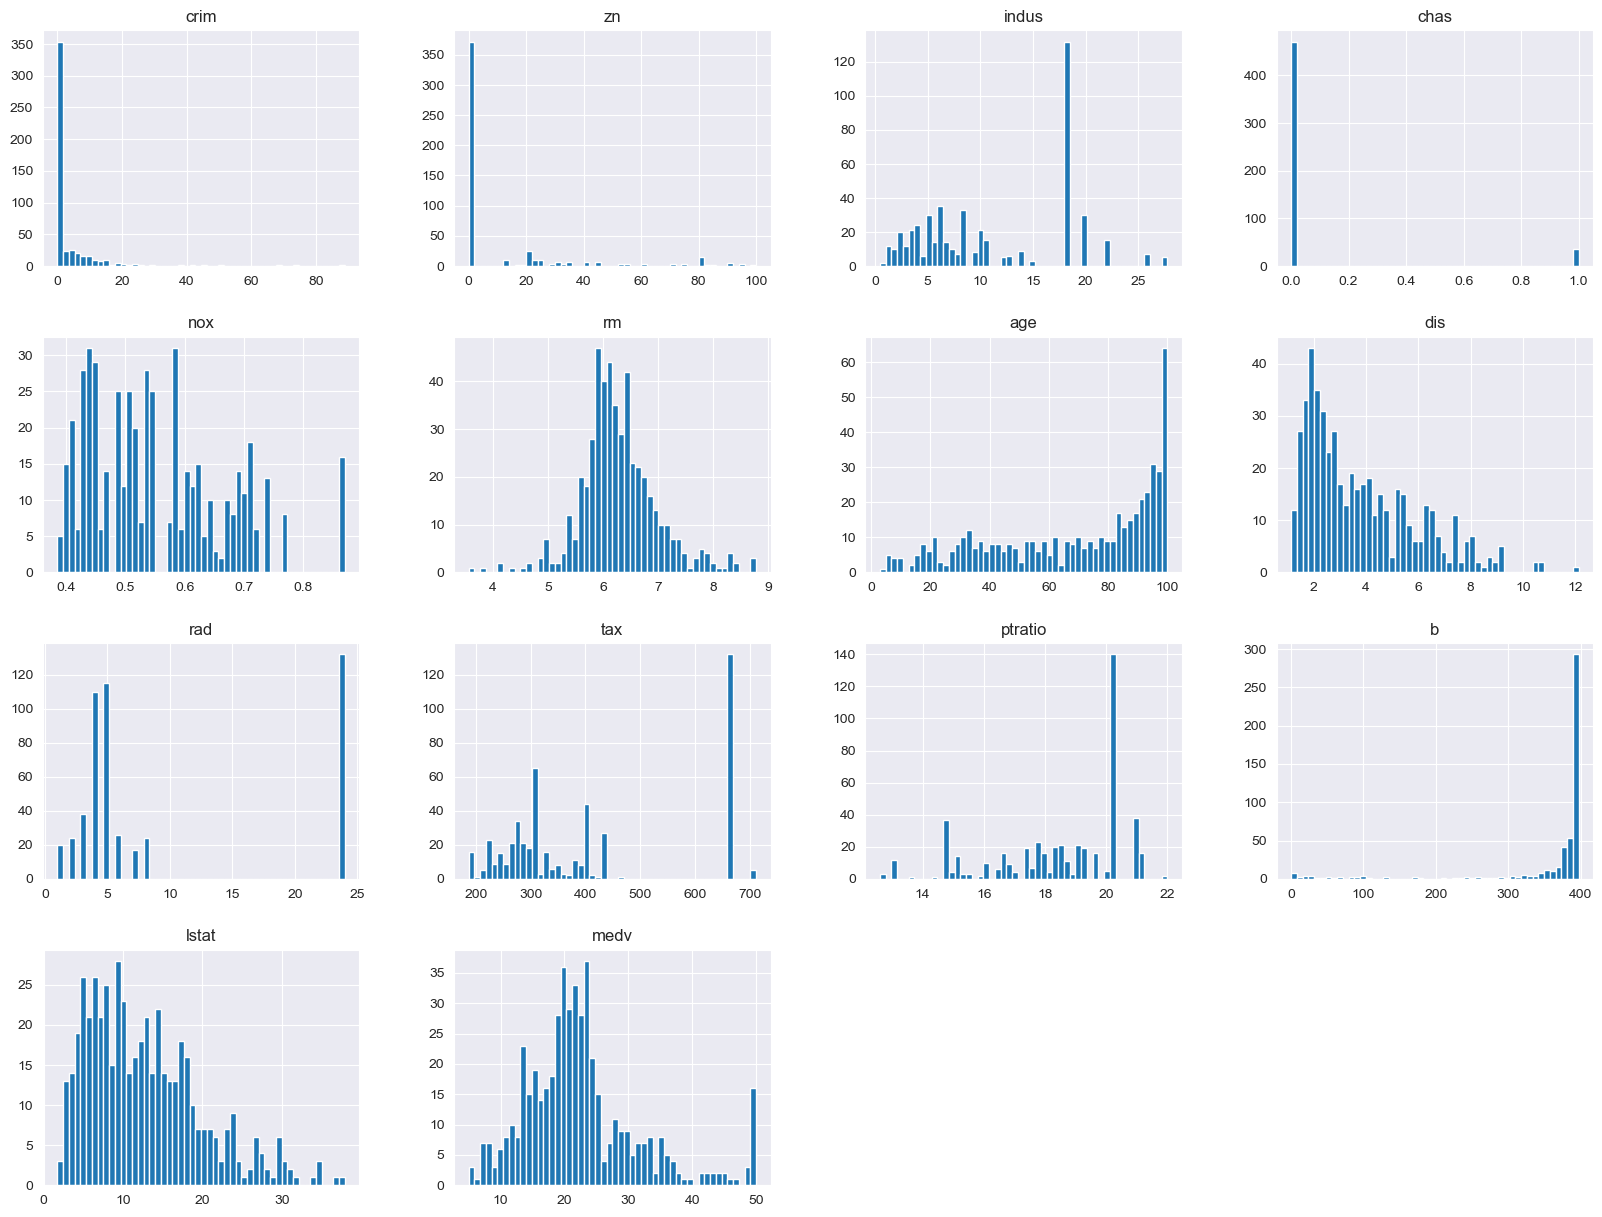

In [7]:
# Plot histograms for all numeric columns
data.hist(bins=50, figsize=(20, 15))
plt.show()

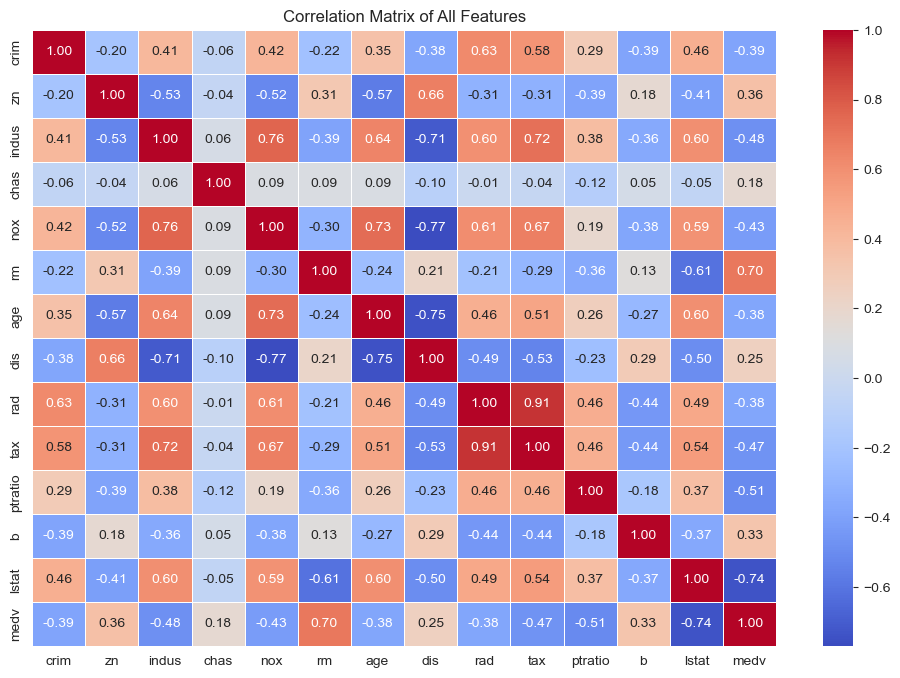

In [8]:
# Compute the correlation matrix for all features
correlation_matrix = data.corr()

# Plot the correlation matrix for all features
plt.figure(figsize=(12, 8))
plt.title('Correlation Matrix of All Features')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()


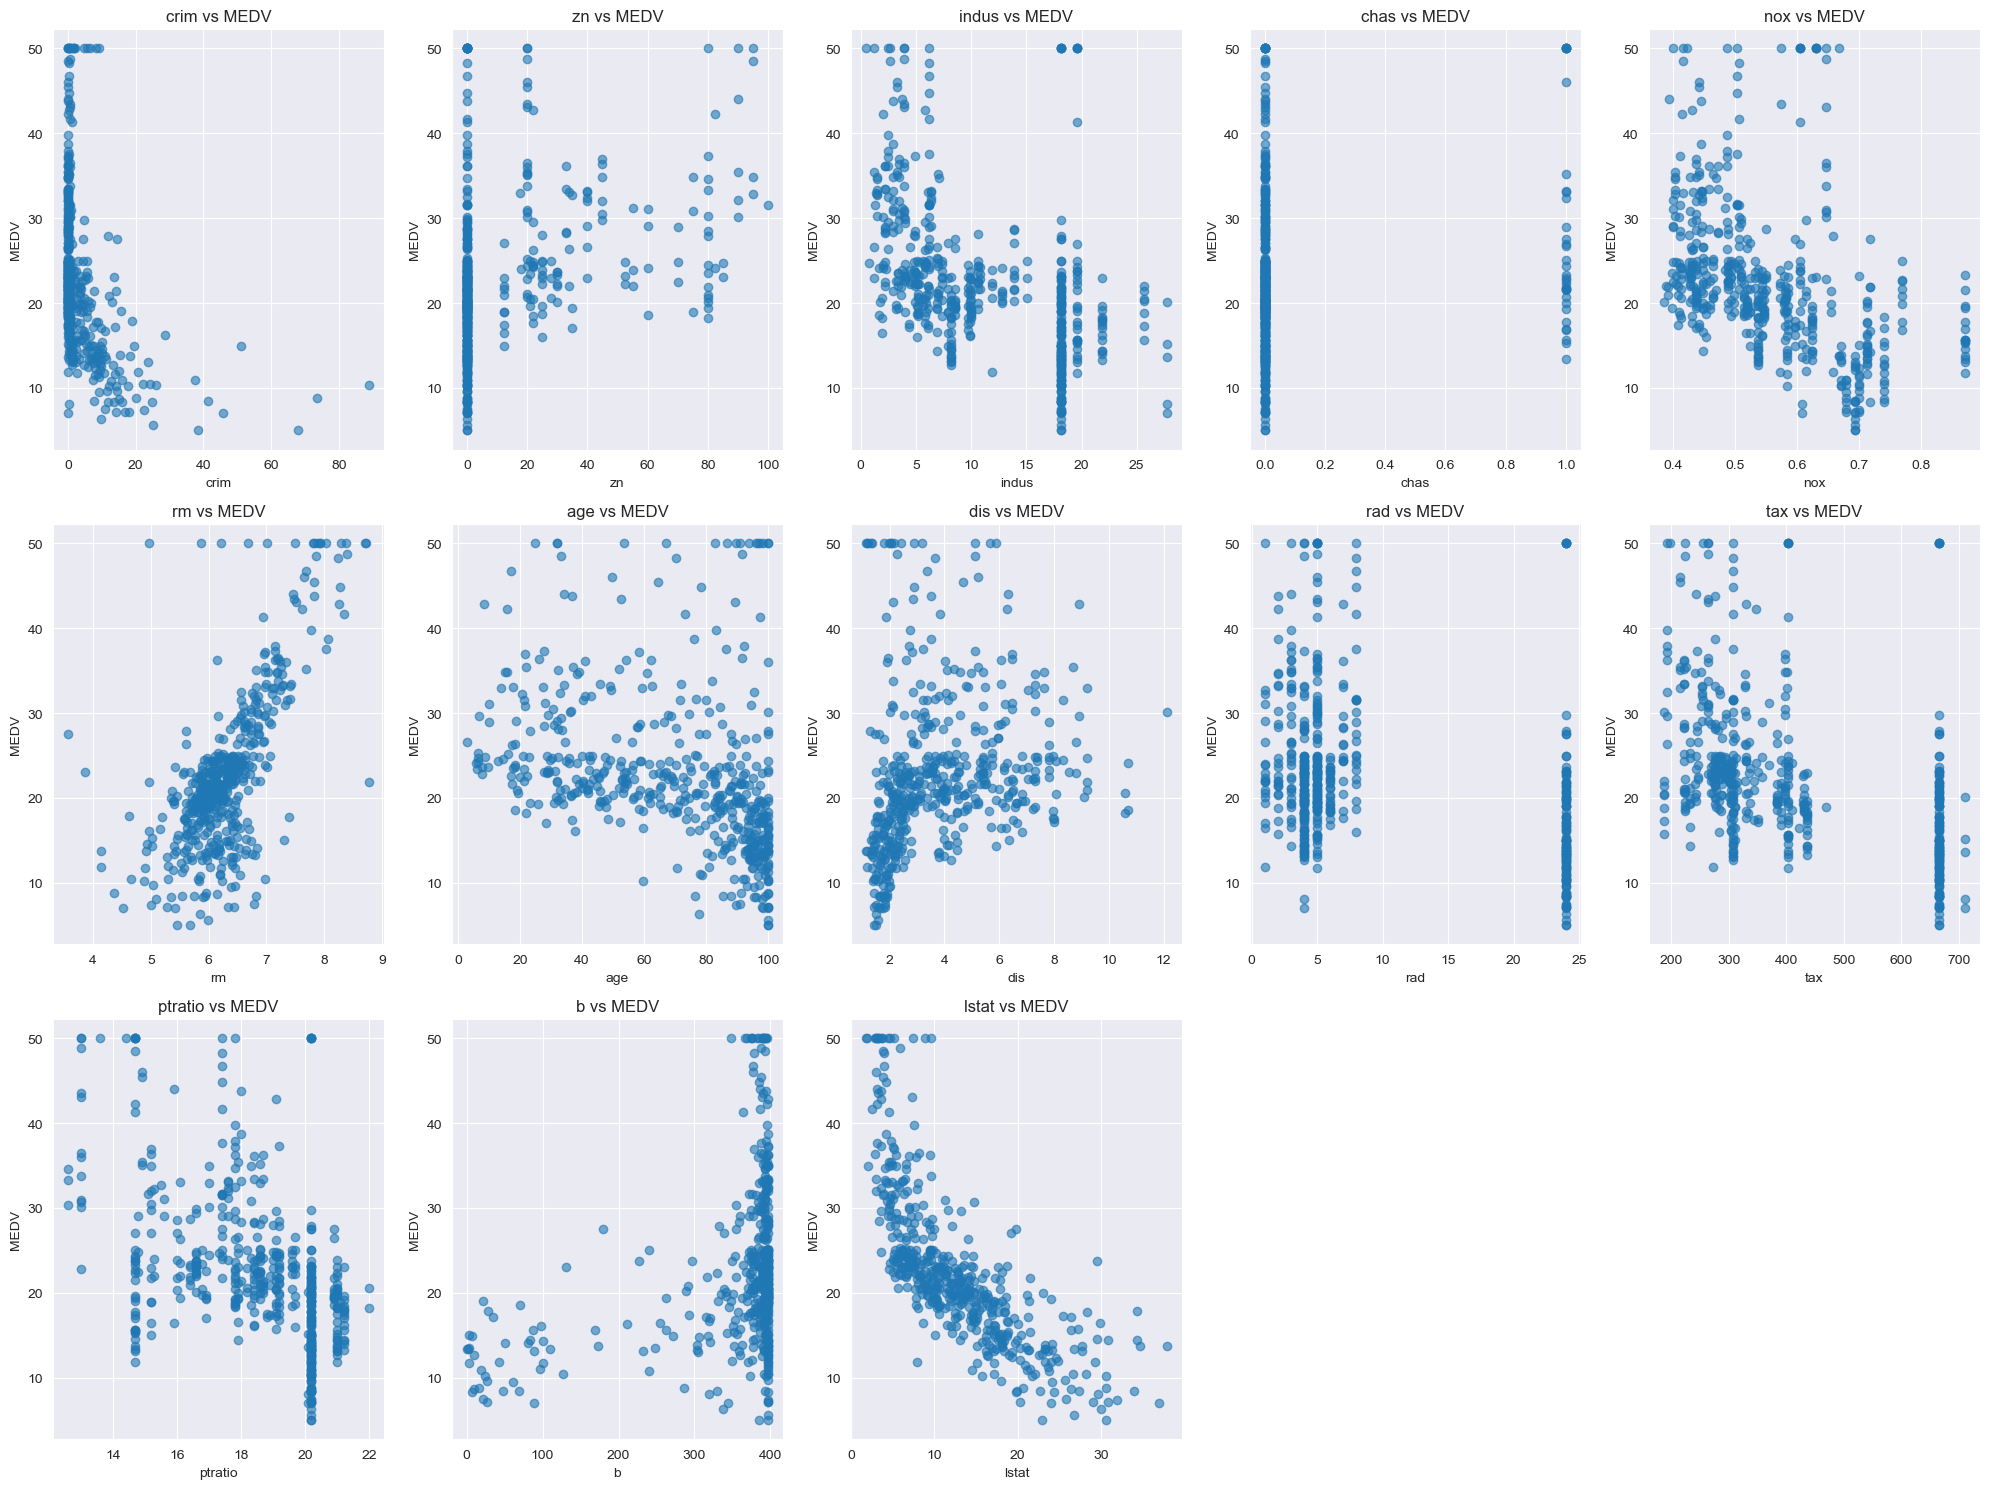

In [9]:
# Get feature names excluding 'medv'
features = [col for col in data.columns if col != 'medv']

# Set the figure size and layout for the subplots
num_features = len(features)  # Number of features
num_rows = (num_features // 5) + (num_features % 5 > 0)  # Calculate number of rows based on number of features
fig, axes = plt.subplots(num_rows, 5, figsize=(20, num_rows * 5))

# Flatten the axes array to make it easier to loop through
axes = axes.flatten()

# Loop through each feature and plot a scatter plot against 'medv'
for i, feature in enumerate(features):
    axes[i].scatter(data[feature], data['medv'], alpha=0.6)
    axes[i].set_title(f'{feature} vs MEDV')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('MEDV')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()


In [10]:
# Create a scaler object
scaler = StandardScaler()

# Apply scaling
scaled_features = scaler.fit_transform(data.iloc[:, :-1])

# Create a new DataFrame with scaled features
data_scaled = pd.DataFrame(scaled_features, columns=data.columns[:-1]) 

# Concatenate the scaled features with the target column
data_scaled = pd.concat([data_scaled, data['medv']], axis=1)

# Check scaled data
data_scaled.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


In [11]:
# Define X (features) and y (target)
X = data_scaled.drop(columns=['medv'])
y = data_scaled['medv']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (404, 13)
Test set size: (102, 13)


In [55]:
# Create a Linear Regression model
model = LinearRegression()

# Perform 5-fold Cross-Validation
cv_mse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Convert negative MSE to positive values
mean_mse = np.abs(cv_mse).mean()
mean_r2 = cv_r2.mean()

print(f"Cross-Validation Mean Squared Error (MSE): {mean_mse}")
print(f"Cross-Validation R-squared: {mean_r2}")

# Train the model on the full training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Set Mean Squared Error (MSE): {mse}")
print(f"Test Set R-squared: {r2}")


Cross-Validation Mean Squared Error (MSE): 23.654418270304653
Cross-Validation R-squared: 0.724435734224026
Test Set Mean Squared Error (MSE): 24.29111947497353
Test Set R-squared: 0.6687594935356318


In [59]:
# Create a Decision Tree Regressor model
tree_model = DecisionTreeRegressor(random_state=42)

# Perform 5-fold Cross-Validation
cv_mse_tree = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_r2_tree = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='r2')

# Convert negative MSE to positive values
mean_mse_tree = np.abs(cv_mse_tree).mean()
mean_r2_tree = cv_r2_tree.mean()

print(f"Cross-Validation Decision Tree Mean Squared Error (MSE): {mean_mse_tree}")
print(f"Cross-Validation Decision Tree R-squared: {mean_r2_tree}")

# Train the model on the full training set
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree_model.predict(X_test)

# Calculate performance metrics on the test set
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Test Set Decision Tree Mean Squared Error (MSE): {mse_tree}")
print(f"Test Set Decision Tree R-squared: {r2_tree}")


Cross-Validation Decision Tree Mean Squared Error (MSE): 28.95176450617284
Cross-Validation Decision Tree R-squared: 0.6687639130836821
Test Set Decision Tree Mean Squared Error (MSE): 10.416078431372549
Test Set Decision Tree R-squared: 0.8579634380978161


In [14]:
# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # Maximum depth of tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples in a leaf
}

# Create a Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {-grid_search.best_score_}")


Best Parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-Validation Score: 23.789989980034925


In [15]:
# Get the best model from grid search
best_tree_model = grid_search.best_estimator_

# Predict on the test set
y_pred_best_tree = best_tree_model.predict(X_test)

# Calculate performance metrics
mse_best_tree = mean_squared_error(y_test, y_pred_best_tree)
r2_best_tree = r2_score(y_test, y_pred_best_tree)

print(f"Optimized Decision Tree Mean Squared Error (MSE): {mse_best_tree}")
print(f"Optimized Decision Tree R-squared: {r2_best_tree}")


Optimized Decision Tree Mean Squared Error (MSE): 9.907988403290357
Optimized Decision Tree R-squared: 0.8648918959815638


In [66]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)

# Perform 5-fold cross-validation and compute MSE scores
cv_mse_scores_rf = -cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_r2_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

# Train the model on the full training set
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate test set performance metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Cross-Validation MSE: {cv_mse_scores_rf.mean():.4f} ± {cv_mse_scores_rf.std():.4f}")
print(f"Random Forest - Cross-Validation R²: {cv_r2_scores_rf.mean():.4f} ± {cv_r2_scores_rf.std():.4f}")
print(f"Random Forest - Test MSE: {mse_rf:.4f}")
print(f"Random Forest - Test R²: {r2_rf:.4f}")



Random Forest - Cross-Validation MSE: 15.0122 ± 4.4608
Random Forest - Cross-Validation R²: 0.8243 ± 0.0498
Random Forest - Test MSE: 8.8667
Random Forest - Test R²: 0.8791


In [68]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Create a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=42)

# Perform 5-fold cross-validation
cv_mse_scores = -cross_val_score(gb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='r2')

# Train the model on the full training set
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate performance metrics on the test set
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print results
print(f"Gradient Boosting - Cross-Validation MSE: {np.mean(cv_mse_scores):.4f} ± {np.std(cv_mse_scores):.4f}")
print(f"Gradient Boosting - Cross-Validation R²: {np.mean(cv_r2_scores):.4f} ± {np.std(cv_r2_scores):.4f}")
print(f"Gradient Boosting - Test MSE: {mse_gb:.4f}")
print(f"Gradient Boosting - Test R²: {r2_gb:.4f}")


Gradient Boosting - Cross-Validation MSE: 13.0945 ± 5.8869
Gradient Boosting - Cross-Validation R²: 0.8483 ± 0.0622
Gradient Boosting - Test MSE: 6.0134
Gradient Boosting - Test R²: 0.9180


In [73]:
# Create a DMatrix, which is the internal data structure for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',  # Root Mean Squared Error as evaluation metric
    'max_depth': 6,  # Maximum depth of trees
    'learning_rate': 0.1,  # Step size at each iteration
}

# Perform 5-fold cross-validation
cv_results = xgb.cv(
    params, 
    dtrain, 
    num_boost_round=500, 
    nfold=5, 
    metrics=['rmse'], 
    early_stopping_rounds=10, 
    seed=42
)

# Get cross-validation RMSE (آخرین مقدار از cv_results)
cv_rmse_mean = cv_results['test-rmse-mean'].iloc[-1]
cv_rmse_std = cv_results['test-rmse-std'].iloc[-1]

# Train the model on full training set
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Predict on the test set
y_pred_xgb = xgb_model.predict(dtest)

# Calculate performance metrics on test set
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print(f"XGBoost - Cross-Validation RMSE: {cv_rmse_mean:.4f} ± {cv_rmse_std:.4f}")
print(f"XGBoost - Test MSE: {mse_xgb:.4f}")
print(f"XGBoost - Test R²: {r2_xgb:.4f}")



XGBoost - Cross-Validation RMSE: 3.4964 ± 0.3343
XGBoost - Test MSE: 6.9362
XGBoost - Test R²: 0.9054


In [89]:
# Creating a dictionary with model names and corresponding metrics
results_dict = {
    'Model': [
        'Linear Regression (CV)', 
        'Decision Tree', 
        'Optimized Decision Tree', 
        'Random Forest', 
        'Gradient Boosting', 
        'XGBoost'
    ],
    'Mean Squared Error (MSE)': [mean_mse, mse_tree, mse_best_tree, mse_rf, mse_gb, mse_xgb],
    'R-squared': [mean_r2, r2_tree, r2_best_tree, r2_rf, r2_gb, r2_xgb]
}

# Creating a DataFrame from the dictionary
results_df = pd.DataFrame(results_dict)

# Sorting the DataFrame based on the 'R-squared' column (ascending order)
results_df = results_df.sort_values(by='R-squared', ascending=True)

# Adding a column for row numbers starting from 1
results_df.insert(0, 'Number', range(1, len(results_df) + 1))

# Defining a format function to display numbers with exactly 4 decimal places
format_func = lambda x: '{:.4f}'.format(x) if isinstance(x, float) else x

# Applying enhanced styling to the DataFrame
styled_results_df = results_df.style.format({
    'Mean Squared Error (MSE)': format_func,
    'R-squared': format_func
}).set_table_styles([
    # Header styling
    {
        'selector': 'th',
        'props': [
            ('background-color', '#2E86C1'),  # Modern blue for header background
            ('color', 'white'),               # White text for header
            ('font-weight', 'bold'),
            ('text-align', 'center'),
            ('font-size', '14px'),
            ('border', '1px solid #ddd')
        ]
    },
    # Styling for all data cells
    {
        'selector': 'td',
        'props': [
            ('border', '1px solid #ddd'),
            ('text-align', 'center'),
            ('padding', '8px'),
            ('color', 'black')  # Default text color (black) for white background cells
        ]
    },
    # Styling for cells with black background (dark background)
    {
        'selector': 'tbody tr:nth-child(odd) td',
        'props': [
            ('background-color', '#333'),  # Dark background for odd rows
            ('color', 'white')  # White text for dark background cells
        ]
    },
    # Alternate row background for even rows
    {
        'selector': 'tbody tr:nth-child(even)',
        'props': [
            ('background-color', '#f9f9f9')
        ]
    },
    # Hover effect for rows
    {
        'selector': 'tbody tr:hover',
        'props': [
            ('background-color', '#f1f1f1')
        ]
    }
]).set_properties(
    **{'font-family': 'Arial, sans-serif', 'font-size': '12px'}  # Setting a clean font style
).set_properties(
    subset=['Model'], **{'color': '#1F618D', 'font-weight': 'bold'}  # Enhancing the 'Model' column appearance
).hide(axis='index')  # Hiding the default index

# Display the styled DataFrame
styled_results_df


Number,Model,Mean Squared Error (MSE),R-squared
1,Linear Regression (CV),23.6544,0.7244
2,Decision Tree,10.4161,0.8580
3,Optimized Decision Tree,9.9080,0.8649
4,Random Forest,8.8667,0.8791
5,XGBoost,6.9362,0.9054
6,Gradient Boosting,6.0134,0.9180


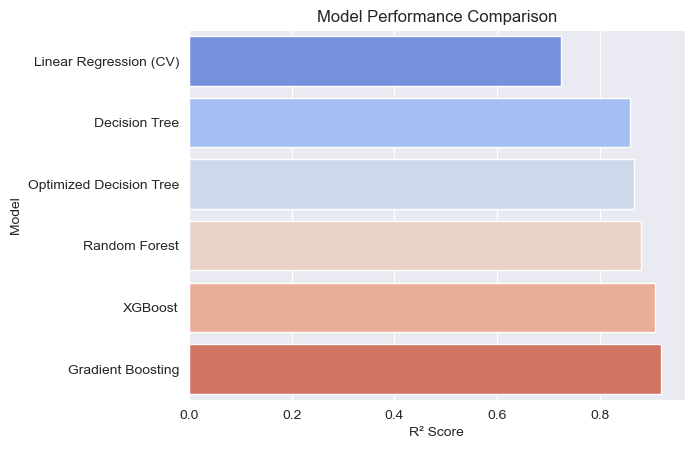

In [90]:
sns.barplot(x='R-squared', y='Model', data=results_df, hue='Model', palette='coolwarm', legend=False)

plt.xlabel("R² Score")
plt.title("Model Performance Comparison")
plt.show()
